# Charge Time Machine Learning Algorithm Generation

## Splitting the data

In [1]:
import pandas as pd
import datetime as td
import  numpy as np
import datetime 
import datetime as dt
df = pd.read_csv('data/chargeML.csv')
df=df._convert(numeric=True)
df['date2'] =  pd.to_datetime(df['date2'])
#df['date2'] =  pd.to_datetime(df['date2'])
df["dayInMonth"] =df['date2'].dt.day
inData=dataSet=df

Thinking of which columns we can actually use.

In [3]:
type(df['date2'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

splitOption = 1 # split per day of the month

#cutOffTestDate=2022.01.01
cutOffTestDate = datetime.datetime(2022, 1, 1)
testSet = dataSet.loc[(inData.date2 > cutOffTestDate), :]
mainSet = dataSet.loc[(inData.date2 <= cutOffTestDate), :]


In [5]:
trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date2 <= cutOffTestDate), :]

In [6]:
'''
if (splitOption == 0):  # Standard SkLearn train test split, usually not good for time series

elif (splitOption == 1):  # split before / after day of the month
  dataSet["dayInMonth"] = 0

  def setDayInMonth(row):
      row["dayInMonth"] = row.date.day
      return row

  dataSet = dataSet.apply(setDayInMonth, axis=1)

  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]
  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= cutOffTestDate), :]
elif (splitOption == 2):  # split per period
  trainSet = dataSet.loc[(inData.date <= cutOffValidationDate), :]
  validSet = dataSet.loc[(inData.date > cutOffValidationDate), :]  
  '''

'\nif (splitOption == 0):  # Standard SkLearn train test split, usually not good for time series\n\nelif (splitOption == 1):  # split before / after day of the month\n  dataSet["dayInMonth"] = 0\n\n  def setDayInMonth(row):\n      row["dayInMonth"] = row.date.day\n      return row\n\n  dataSet = dataSet.apply(setDayInMonth, axis=1)\n\n  trainSet = dataSet.loc[(dataSet.dayInMonth > 0) & (dataSet.dayInMonth < 23), :]\n  validSet = dataSet.loc[(dataSet.dayInMonth >= 23) & (inData.date <= cutOffTestDate), :]\nelif (splitOption == 2):  # split per period\n  trainSet = dataSet.loc[(inData.date <= cutOffValidationDate), :]\n  validSet = dataSet.loc[(inData.date > cutOffValidationDate), :]  \n  '

In [7]:
y_train = trainSet.ActualWind
y_valid = validSet.ActualWind
y_test = testSet.ActualWind

In [8]:
X_train = trainSet
X_valid = validSet 

## Random forest generation

In [9]:
y_test.dtypes

dtype('float64')

In [10]:
X_train.dtypes

date2                 datetime64[ns]
ActualGenerationMW           float64
ForecastWind                 float64
ActualWind                   float64
ActualDemand                 float64
ker_temp                     float64
dub_temp                     float64
dub_wddir                    float64
don_wddir                    float64
dub_wdsp                     float64
may_wdsp                     float64
dub_msl                      float64
hour                           int64
dayOfWeek                      int64
dayOfYear                      int64
sin_hour                     float64
sin_day                      float64
cos_hour                     float64
cos_day                      float64
sin_wind                     float64
cos_wind                     float64
totalImbalance               float64
dayInMonth                     int64
dtype: object

In [11]:
X_train1 = X_train[['ActualWind','dayOfWeek','ActualDemand' ]]

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train)



RandomForestClassifier(n_estimators=20)

In [15]:
X_valid1 = X_valid[['ActualWind','dayOfWeek','ActualDemand' ]]

In [27]:
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]

In [16]:
y_pred=clf.predict(X_valid1)

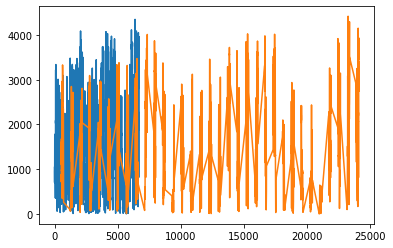

In [20]:
import matplotlib.pyplot as plt 
plt.plot(y_pred)
plt.plot(y_valid)

In [21]:

# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

In [ ]:

mae, y, yhat = walk_forward_validation(data, 12)

In [ ]:

 
# load the dataset
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [22]:
X_train = trainSet
X_valid = validSet 

In [26]:
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]
y_testpred=clf.predict(X_valid1)

ValueError: X has 5 features, but DecisionTreeClassifier is expecting 3 features as input.

In [33]:
X_train1 = X_train[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]

In [28]:
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]

In [34]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train1,y_train)

MemoryError: could not allocate 1018953728 bytes

In [ ]:
X_valid1 = X_valid[['ForecastWind','dayOfWeek','dub_msl','hour','dub_wddir']]
y_pred=clf.predict(X_valid1)